# Population change correlation analysis

This Notebook contains the analysis for correlations with population change from 2010 to 2020 with Accessibility, Marginalization and House density

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
from scipy.stats import gaussian_kde
from pandas.api.types import CategoricalDtype

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


# AMG

In [2]:
c = 'Guadalajara'
res = 8

## Accessibility

Download accessibility hex_bins

In [3]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM processed.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [4]:
print(hex_bins.shape)
hex_bins.head(2)

(2969, 19)


,idx_accessibility,idx_hospitales,idx_supermercado,idx_farmacias,node_count,wAcc,wHsp,wSpm,wFrm,idx_accessibility_wavg,idx_hospitales_wavg,idx_supermercado_wavg,idx_farmacias_wavg,geometry,hex_id_8,CVEGEO,dist_farmacia,dist_hospitales,dist_supermercados
0,0.000157,0.000473,5.887650e-24,2.189688e-23,5,0.000787,0.002364,2.943825e-23,1.094844e-22,4.657651e-09,1.398694e-08,1.742094e-28,6.479058e-28,"POLYGON ((-103.54324 20.40862, -103.54269 20.4...",8849aa2611fffff,14002,9041.266800,9983.789800,9250.494800
1,0.000343,0.001031,1.124020e-21,4.180368e-21,12,0.004118,0.012368,1.348825e-20,5.016442e-20,2.437182e-08,7.318864e-08,7.982061e-26,2.968625e-25,"POLYGON ((-103.54722 20.40036, -103.54269 20.4...",8849aa261bfffff,14002,8371.216417,9313.739417,8580.444417


<AxesSubplot:>

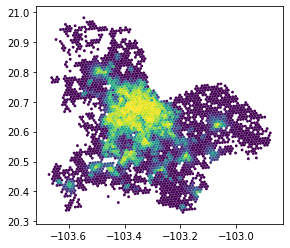

In [5]:
hex_bins.loc[hex_bins.idx_accessibility>0].plot('idx_accessibility')

## Marginalization

Download marginalization hex_bins

In [6]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_marg = hex_marg.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [7]:
print(hex_marg.shape)
hex_marg.head(2)

(1163, 17)


,geometry,hex_id_8,CVEGEO,pobtot,p6a14nae,sbasc,psdss,ovsde,ovsee,ovsae,ovpt,ovsref,ovsint,ovscel,ovhac,im_2020,imn_2020
0,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",8849abc9ebfffff,14002,273.168550,0.474944,2.828432,1.787101,0.1098,0.008903,0.115735,0.029676,0.697379,4.282201,0.593514,2.756871,120.556725,0.941744
1,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",8849abc9e3fffff,14002,89.333336,1.282051,7.092198,7.960199,0.0000,0.000000,0.621891,0.000000,1.492537,15.049751,0.373134,8.333333,122.339516,0.955670


<AxesSubplot:>

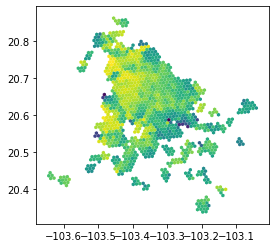

In [8]:
hex_marg.plot('imn_2020')

## Population change

In [9]:
grl_dir = '/home/edgaregurrola/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/'
hex_pop = gpd.read_file(grl_dir+f'Info_Sociodemografica/Analisis/Block_Census/{c}_Census_10_20_BlockAnalysis_res{res}.geojson', driver='GeoJSON')
print(hex_pop.shape)
hex_pop.head(2)

(1160, 430)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,Z_RTViv_10_20,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,R_TVivDes_10_20,DensPob_10_20,geometry
0,8849aa2d99fffff,848.0,427.0,421.0,46.0,16.0,24.0,794.0,403.0,391.0,...,None,0.716981,0.160377,-0.281484,0.0,None,0.716981,None,-2.276028,"POLYGON ((-103.32340 20.57940, -103.31887 20.5..."
1,88498c95cbfffff,7259.0,3697.0,3557.0,310.0,149.0,128.0,6899.0,3510.0,3389.0,...,None,0.839589,0.083110,0.391420,0.0,None,0.839589,None,-4.227884,"POLYGON ((-103.29386 20.71601, -103.28932 20.7..."


<AxesSubplot:>

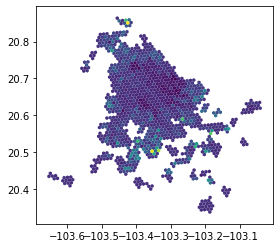

In [10]:
hex_pop.plot('T_Pob_10_20')

## Correlation analysis

In [11]:
import numpy as np

hex_corr = pd.merge(hex_pop[['hex_id_8','T_Pob_10_20',
                            'R_VivDes_20','geometry']], hex_bins[['hex_id_8','idx_accessibility']],
                   on='hex_id_8')
hex_corr = pd.merge(hex_corr, hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')
print(hex_corr.shape)
hex_corr.head(2)

(1126, 6)


,hex_id_8,T_Pob_10_20,R_VivDes_20,geometry,idx_accessibility,imn_2020
0,8849aa2d99fffff,-197.0,0.160377,"POLYGON ((-103.32340 20.57940, -103.31887 20.5...",0.542387,0.939849
1,88498c95cbfffff,-366.0,0.083110,"POLYGON ((-103.29386 20.71601, -103.28932 20.7...",0.682275,0.942672


### Accessibility vs Population change

Text(0, 0.5, 'Cambio en la población (2010 vs 2020)')

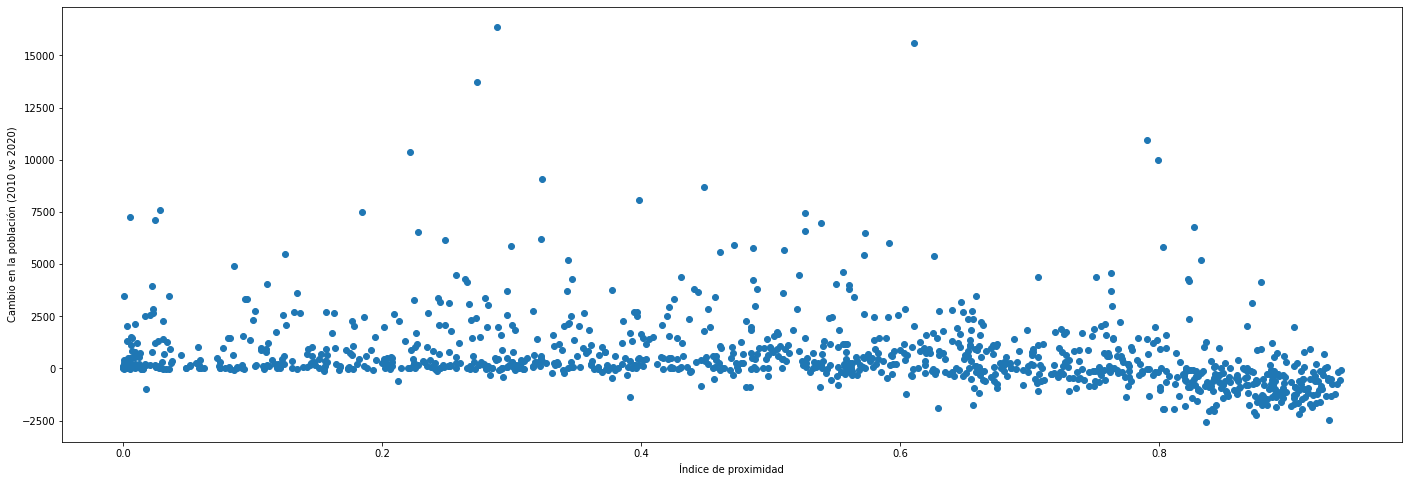

In [12]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.idx_accessibility, hex_corr.T_Pob_10_20)

plt.xlabel('Índice de proximidad')
plt.ylabel('Cambio en la población (2010 vs 2020)')

In [13]:
x = np.array(hex_corr.idx_accessibility)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.       , -0.2397116],
       [-0.2397116,  1.       ]])

### Marginalization vs Population change

Text(0, 0.5, 'Cambio en la población (2010 vs 2020)')

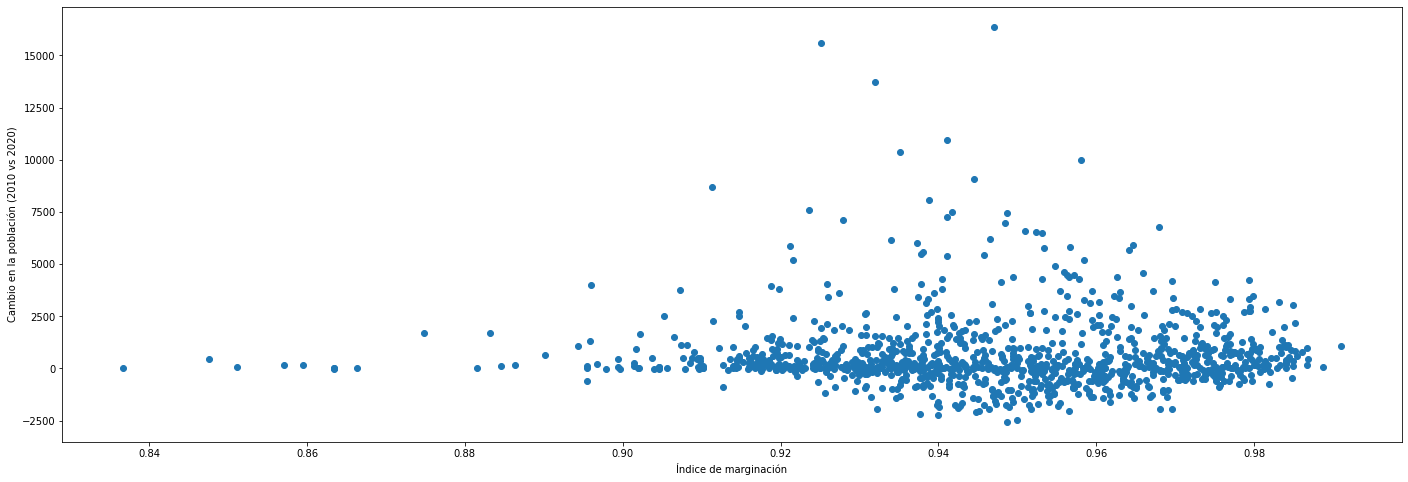

In [14]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.T_Pob_10_20)

plt.xlabel('Índice de marginación')
plt.ylabel('Cambio en la población (2010 vs 2020)')

In [15]:
x = np.array(hex_corr.imn_2020)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.        , -0.00376165],
       [-0.00376165,  1.        ]])

### Empty houses vs Population change

(0.0, 1.0)

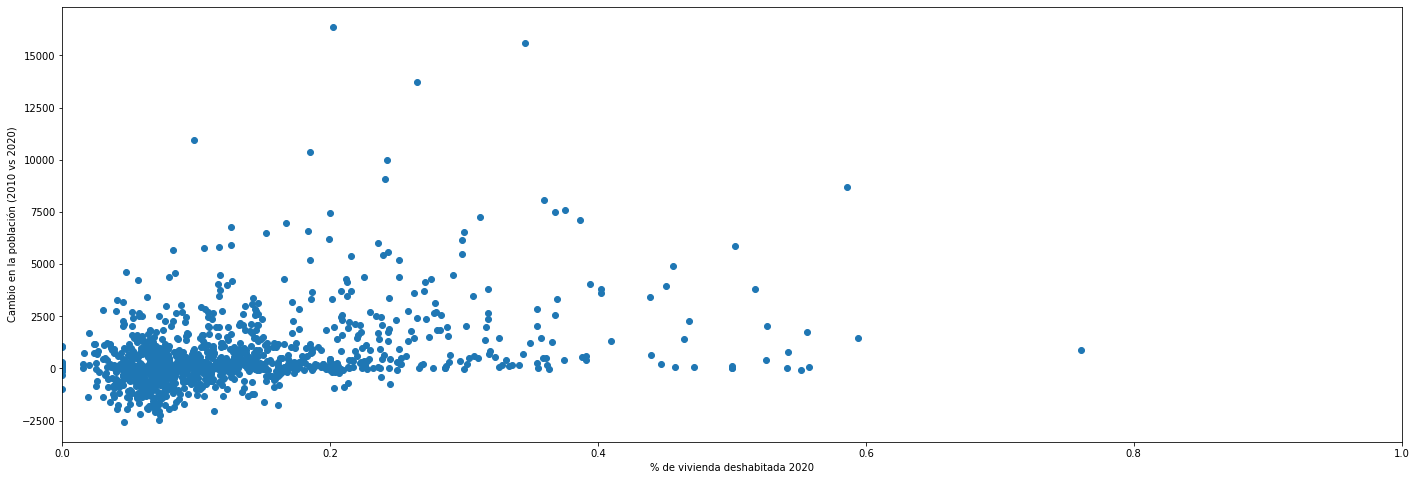

In [16]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.R_VivDes_20, hex_corr.T_Pob_10_20)

plt.xlabel('% de vivienda deshabitada 2020')
plt.ylabel('Cambio en la población (2010 vs 2020)')

ax.set_xlim([0, 1])

In [17]:
x = np.array(hex_corr.R_VivDes_20)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[nan, nan],
       [nan,  1.]])

### Data distribution

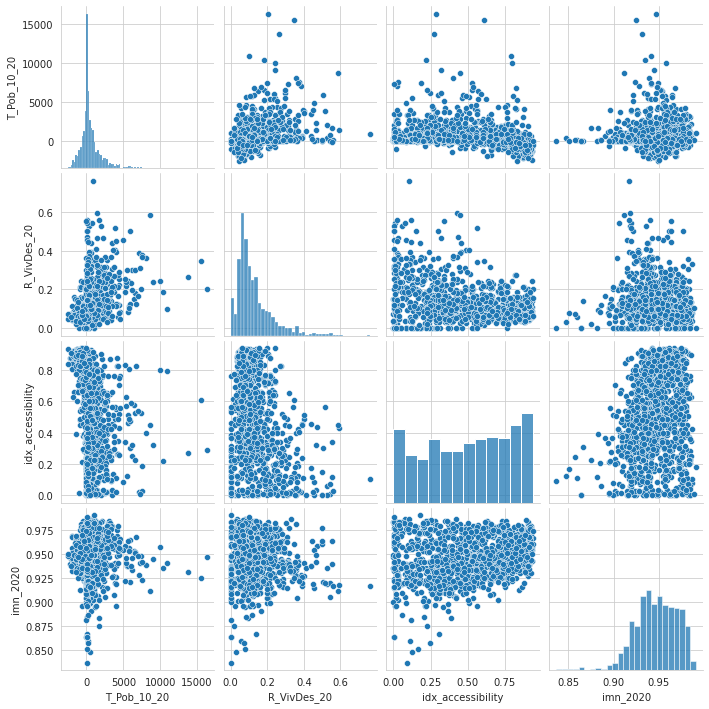

In [18]:
sns.set_style('whitegrid')
sns.pairplot(hex_corr, palette='deep')
plt.show()

## Boxplots

### Group data marginalization

In [19]:
hex_corr['Grado_Marg'] = np.nan
hex_corr.loc[hex_corr.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.946436 )&
             (hex_corr.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.926536)&
             (hex_corr.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_corr.loc[(hex_corr.imn_2020>=0.8999)&
             (hex_corr.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_corr.loc[hex_corr.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

In [20]:
#categorical data
cat_list = ['Muy bajo','Bajo','Medio','Alto', 'Muy alto']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_corr['Grado_Marg'] = hex_corr['Grado_Marg'].astype(cat_size_order)
hex_corr = hex_corr.sort_values('Grado_Marg')

<AxesSubplot:>

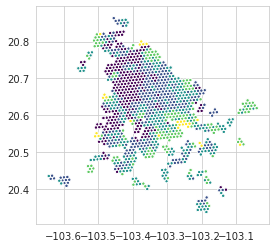

In [21]:
hex_corr.plot('Grado_Marg', 'viridis')

Text(0, 0.5, 'Cambio en la población (2010 vs 2020)')

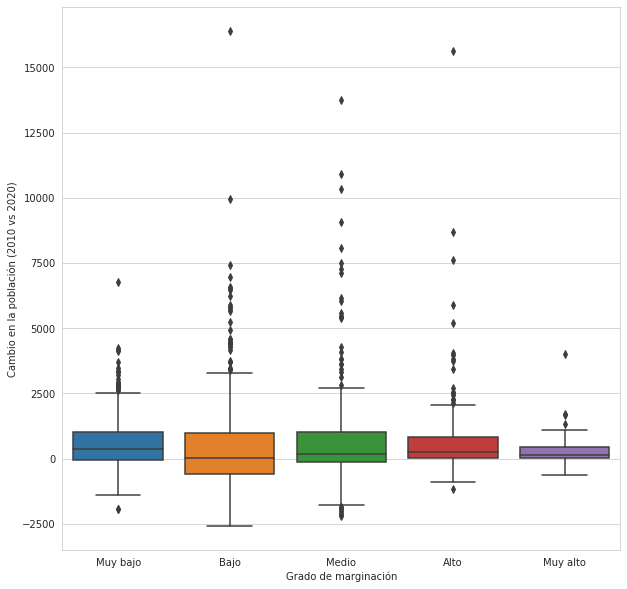

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_corr.Grado_Marg) , y=np.array(hex_corr.T_Pob_10_20), ax=ax)

plt.xlabel('Grado de marginación')
plt.ylabel('Cambio en la población (2010 vs 2020)')

In [23]:
hex_corr.groupby('Grado_Marg').agg(['median','mean','std'])

T_Pob_10_20                          R_VivDes_20            \
                median        mean          std      median      mean   
Grado_Marg                                                              
Muy bajo         364.0  633.488550  1148.505028    0.084639  0.102606   
Bajo              27.0  567.490741  2059.320426    0.102323  0.125690   
Medio            167.0  669.344311  1888.972282    0.103743  0.140676   
Alto             247.5  769.916667  1685.362507    0.114413  0.148805   
Muy alto         124.0  456.730769   908.310676    0.079196  0.078824   

                     idx_accessibility                      imn_2020  \
                 std            median      mean       std    median   
Grado_Marg                                                             
Muy bajo    0.070469          0.553842  0.501355  0.302406  0.975153   
Bajo        0.087528          0.706292  0.613467  0.274646  0.955649   
Medio       0.104547          0.511655  0.486443  0.268473  0.937461   
Alto        0.136152          0.367757  0.373619  0.228632  0.918960   
Muy alto    0.063987          0.187259  0.192523  0.161036  0.885449   

                                
                mean       std  
Grado_Marg                      
Muy bajo    0.975306  0.005496  
Bajo        0.955840  0.005597  
Medio       0.936986  0.005279  
Alto        0.917622  0.006467  
Muy alto    0.879788  0.019057

### Group by accessibility

In [24]:
hex_corr['Nivel_Acc'] = np.nan
hex_corr.loc[hex_corr.idx_accessibility>=0.75 , 'Nivel_Acc'] = 'Alto'
hex_corr.loc[(hex_corr.idx_accessibility>=0.50 )&
             (hex_corr.idx_accessibility<0.75), 'Nivel_Acc'] = 'Medio'
hex_corr.loc[(hex_corr.idx_accessibility>=0.25)&
             (hex_corr.idx_accessibility<0.50), 'Nivel_Acc'] = 'Bajo'
hex_corr.loc[hex_corr.idx_accessibility < 0.25, 'Nivel_Acc'] = 'Muy bajo'

<AxesSubplot:>

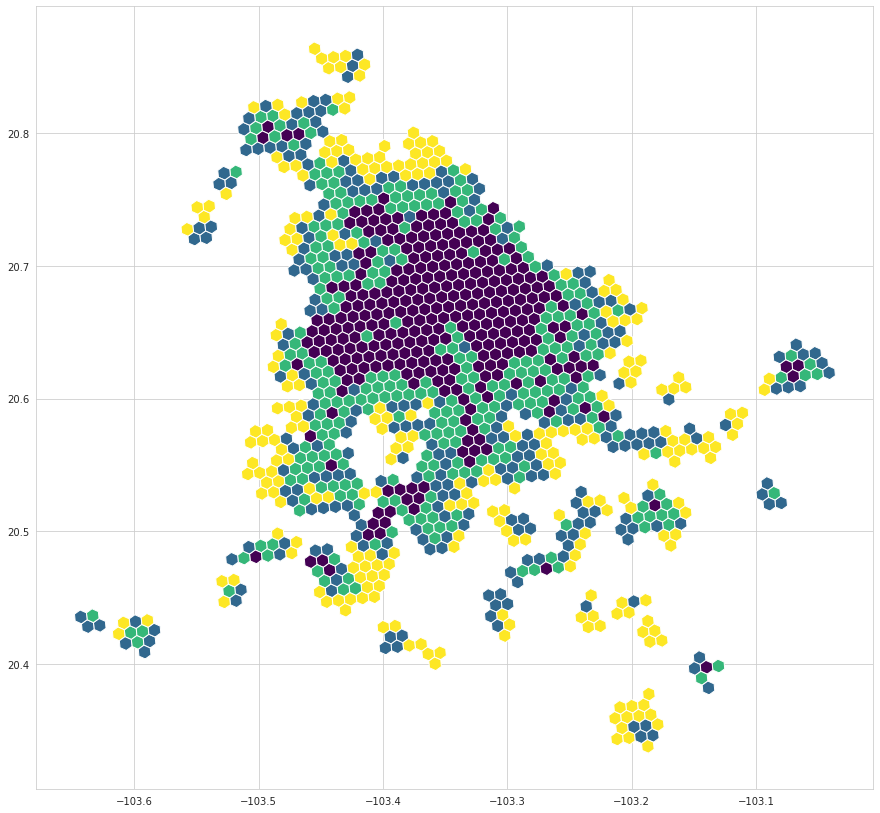

In [25]:
fig, ax = plt.subplots(figsize=(15,15))

hex_corr.plot('Nivel_Acc', 'viridis', ax=ax)

In [26]:
#categorical data
cat_list = ['Alto','Medio','Bajo','Muy bajo']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_corr['Nivel_Acc'] = hex_corr['Nivel_Acc'].astype(cat_size_order)
hex_corr = hex_corr.sort_values('Nivel_Acc')

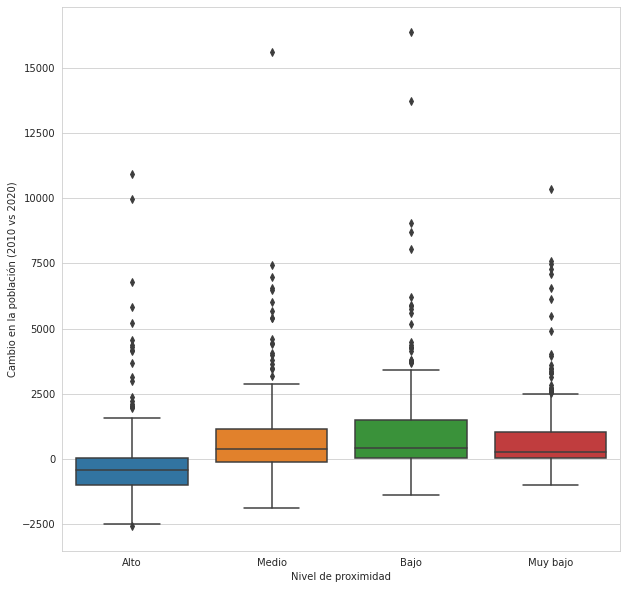

In [27]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array(hex_corr.Nivel_Acc)
y = np.array(hex_corr.T_Pob_10_20)

sns.boxplot(x=x , y=y, ax=ax)

plt.xlabel('Nivel de proximidad')
plt.ylabel('Cambio en la población (2010 vs 2020)')

plt.savefig(f'../data/processed/pop_chng/{c}_BoxPlot_PopChange_ProximityGrpup_res{res}.svg')

In [28]:
hex_corr.groupby('Nivel_Acc').agg(['median','mean','std'])

T_Pob_10_20                           R_VivDes_20            \
               median         mean          std      median      mean   
Nivel_Acc                                                               
Alto           -412.0  -174.489865  1565.656427    0.073156  0.088121   
Medio           395.0   807.703704  1640.707391    0.090278  0.106032   
Bajo            428.5  1125.276119  1976.970968    0.131387  0.150047   
Muy bajo        261.0   883.203774  1495.273973    0.144928  0.172892   

                    idx_accessibility                      imn_2020            \
                std            median      mean       std    median      mean   
Nivel_Acc                                                                       
Alto       0.044380          0.851810  0.849433  0.052948  0.955330  0.955024   
Medio      0.064046          0.627565  0.624577  0.070630  0.945796  0.947158   
Bajo       0.105142          0.371944  0.372400  0.073775  0.940870  0.942430   
Muy bajo   0.140507          0.102558  0.106086  0.082892  0.939617  0.942106   

                     
                std  
Nivel_Acc            
Alto       0.014661  
Medio      0.019866  
Bajo       0.023179  
Muy bajo   0.029561

Text(0, 0.5, 'Índice de proximidad')

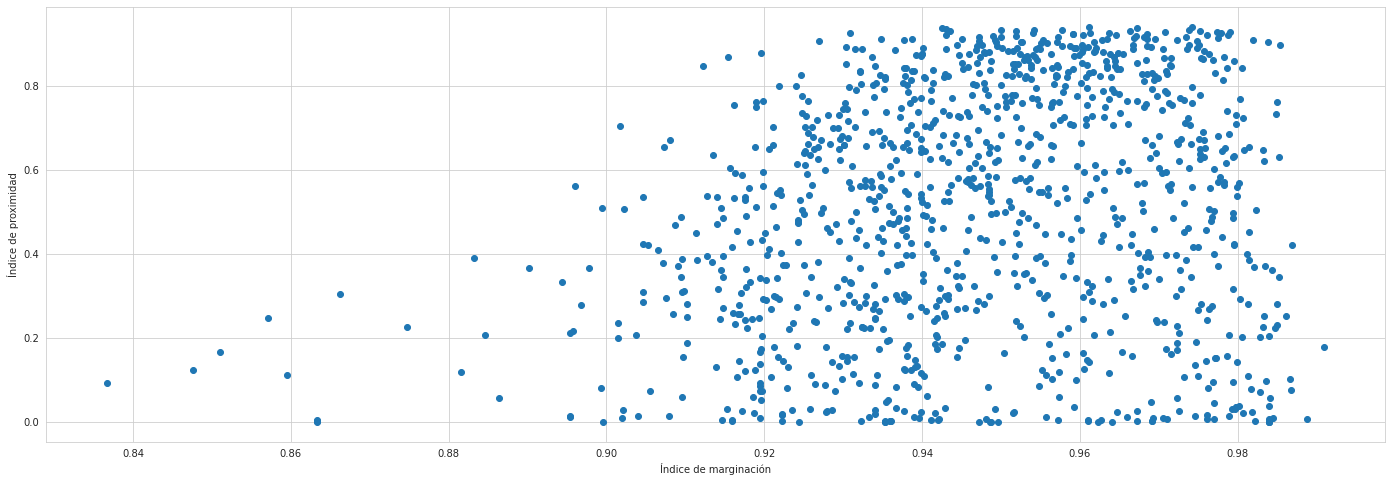

In [29]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.idx_accessibility)

plt.xlabel('Índice de marginación')
plt.ylabel('Índice de proximidad')

In [30]:
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.21447325],
       [0.21447325, 1.        ]])

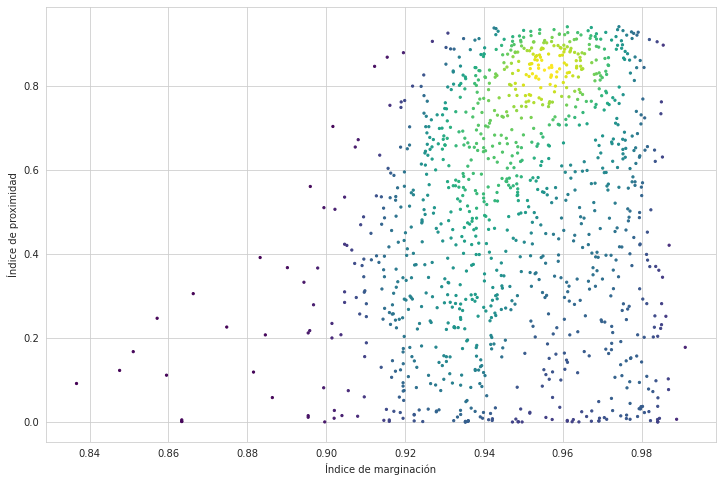

In [31]:
fig, ax = plt.subplots(figsize=(12,8))


# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

ax.scatter(x, y, c=z, s=5, cmap='viridis')

plt.xlabel('Índice de marginación')
plt.ylabel('Índice de proximidad')

plt.show()

# Monterrey

In [32]:
c = 'Monterrey'
res = 8

In [33]:
# df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
# c = 'Monterrey'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM processed.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))
    
print(hex_bins.shape)

(3809, 19)


In [34]:
# df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
# c = 'Monterrey'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_marg = hex_marg.append(aup.gdf_from_query(query, geometry_col='geometry'))
print(hex_marg.shape)

(1463, 17)


In [36]:
grl_dir = '/home/edgaregurrola/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/'
hex_pop = gpd.read_file(grl_dir+f'Info_Sociodemografica/Analisis/Block_Census/{c}_Census_10_20_BlockAnalysis_res{res}.geojson', driver='GeoJSON')
print(hex_pop.shape)
hex_pop.head(2)

(1490, 430)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,Z_RTViv_10_20,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,R_TVivDes_10_20,DensPob_10_20,geometry
0,8848a205b1fffff,10619.0,5338.0,5281.0,447.0,156.0,187.0,10127.0,5100.0,5027.0,...,None,0.898835,0.059779,0.660828,0.0,None,0.898835,None,41.426663,"POLYGON ((-100.33358 25.79790, -100.32883 25.8..."
1,8848a21105fffff,304.0,136.0,156.0,4.0,0.0,3.0,129.0,52.0,75.0,...,None,0.793388,0.049587,0.158093,0.0,None,0.793388,None,2.413829,"POLYGON ((-100.16099 25.45600, -100.15625 25.4..."


In [37]:
import numpy as np

hex_corr = pd.merge(hex_pop[['hex_id_8','T_Pob_10_20',
                            'R_VivDes_20','geometry']], hex_bins[['hex_id_8','idx_accessibility']],
                   on='hex_id_8')
hex_corr = pd.merge(hex_corr, hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')
print(hex_corr.shape)
hex_corr.head(2)

(1421, 6)


,hex_id_8,T_Pob_10_20,R_VivDes_20,geometry,idx_accessibility,imn_2020
0,8848a205b1fffff,3557.0,0.059779,"POLYGON ((-100.33358 25.79790, -100.32883 25.8...",0.707410,0.978164
1,8848a21105fffff,207.0,0.049587,"POLYGON ((-100.16099 25.45600, -100.15625 25.4...",0.061643,0.935282


Text(0, 0.5, 'Cambio en la población (2010 vs 2020)')

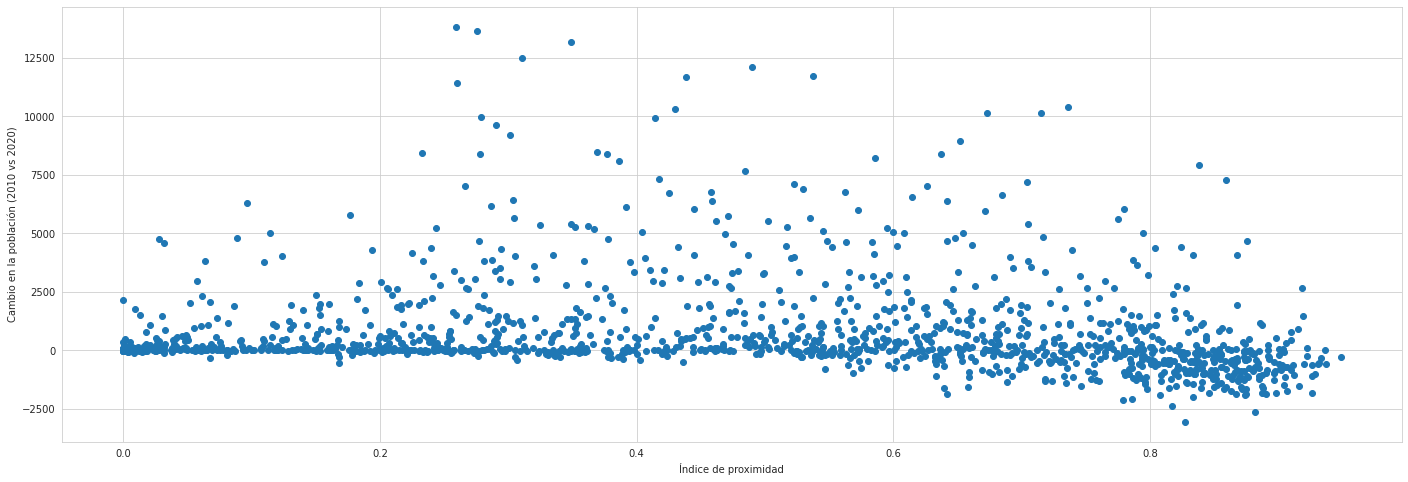

In [38]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.idx_accessibility, hex_corr.T_Pob_10_20)

plt.xlabel('Índice de proximidad')
plt.ylabel('Cambio en la población (2010 vs 2020)')

In [39]:
x = np.array(hex_corr.idx_accessibility)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.        , -0.13438812],
       [-0.13438812,  1.        ]])

Text(0, 0.5, 'Cambio en la población (2010 vs 2020)')

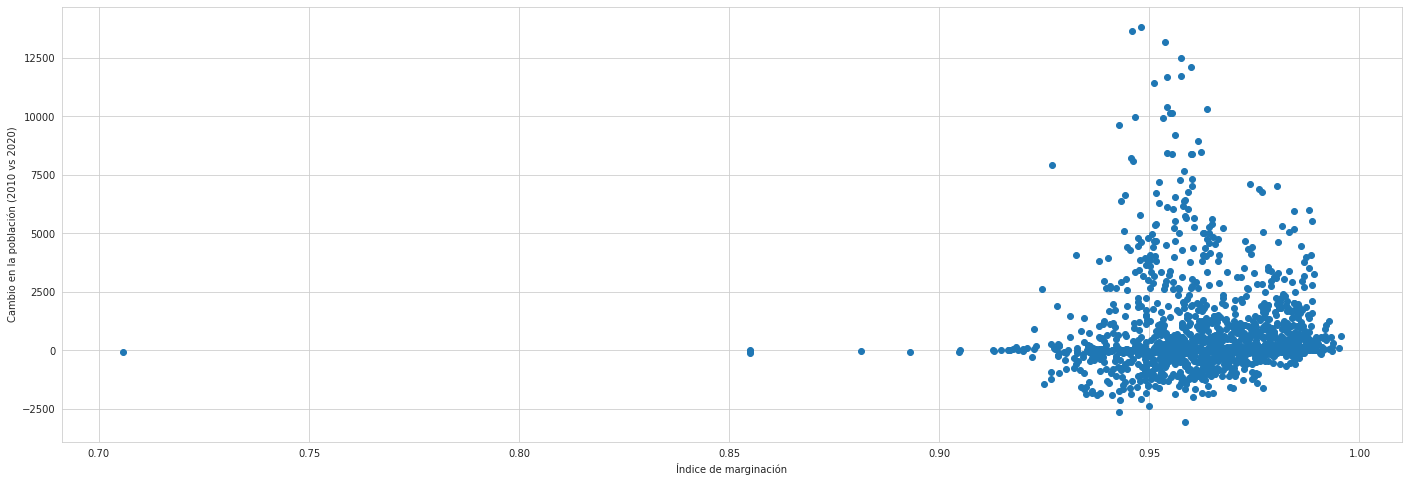

In [40]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.T_Pob_10_20)

plt.xlabel('Índice de marginación')
plt.ylabel('Cambio en la población (2010 vs 2020)')

In [41]:
x = np.array(hex_corr.imn_2020)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[1.        , 0.03272964],
       [0.03272964, 1.        ]])

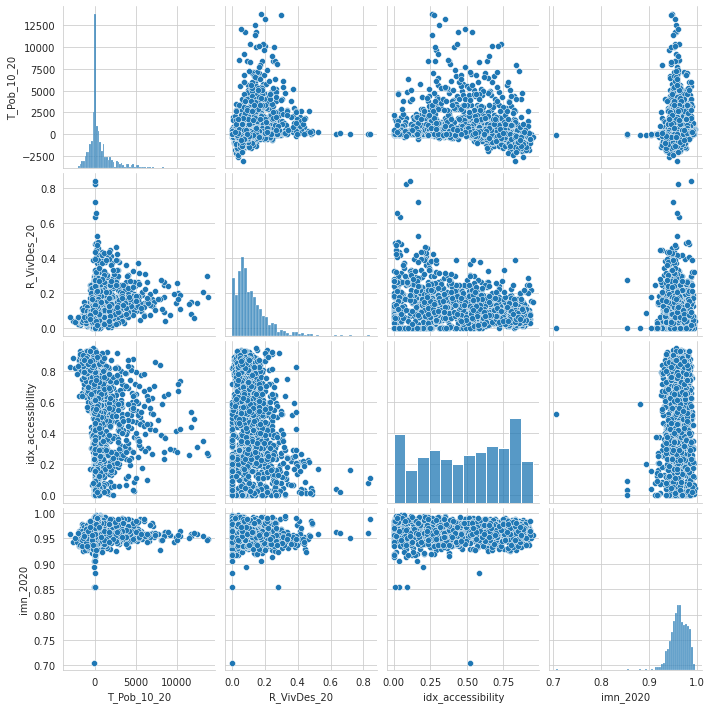

In [42]:
sns.set_style('whitegrid')
sns.pairplot(hex_corr, palette='deep')
plt.show()

In [43]:
hex_corr['Grado_Marg'] = np.nan
hex_corr.loc[hex_corr.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.946436 )&
             (hex_corr.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.926536)&
             (hex_corr.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_corr.loc[(hex_corr.imn_2020>=0.8999)&
             (hex_corr.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_corr.loc[hex_corr.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

In [44]:
#categorical data
cat_list = ['Muy bajo','Bajo','Medio','Alto', 'Muy alto']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_corr['Grado_Marg'] = hex_corr['Grado_Marg'].astype(cat_size_order)
hex_corr = hex_corr.sort_values('Grado_Marg')

Text(0, 0.5, 'Cambio en la población (2010 vs 2020)')

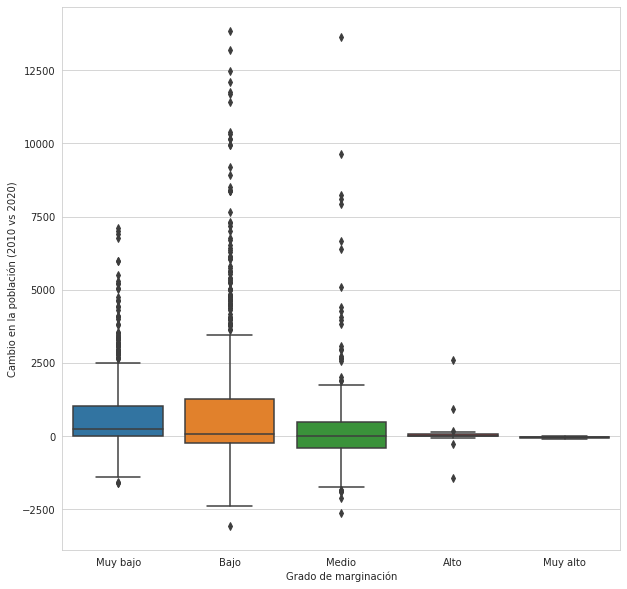

In [45]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_corr.Grado_Marg) , y=np.array(hex_corr.T_Pob_10_20), ax=ax)

plt.xlabel('Grado de marginación')
plt.ylabel('Cambio en la población (2010 vs 2020)')

In [46]:
hex_corr.groupby('Grado_Marg').agg(['median','mean','std'])

T_Pob_10_20                           R_VivDes_20            \
                median         mean          std      median      mean   
Grado_Marg                                                               
Muy bajo         229.5   688.704082  1301.681586    0.074041  0.092795   
Bajo              62.5  1015.861111  2521.414006    0.111111  0.129177   
Medio             -2.0   414.489691  2060.972835    0.105636  0.136515   
Alto              11.0   112.666667   692.620844    0.059581  0.110797   
Muy alto         -38.0   -38.500000    32.389813    0.000000  0.073203   

                     idx_accessibility                      imn_2020  \
                 std            median      mean       std    median   
Grado_Marg                                                             
Muy bajo    0.080679          0.552391  0.512265  0.275351  0.977972   
Bajo        0.101909          0.523892  0.489141  0.289404  0.957801   
Medio       0.110583          0.457632  0.466023  0.276011  0.939589   
Alto        0.125900          0.143703  0.198060  0.207926  0.918807   
Muy alto    0.120575          0.147349  0.239970  0.253546  0.854966   

                                
                mean       std  
Grado_Marg                      
Muy bajo    0.977883  0.007076  
Bajo        0.957317  0.005494  
Medio       0.938973  0.005223  
Alto        0.917825  0.005528  
Muy alto    0.840875  0.068153

In [47]:
hex_corr['Nivel_Acc'] = np.nan
hex_corr.loc[hex_corr.idx_accessibility>=0.75 , 'Nivel_Acc'] = 'Alto'
hex_corr.loc[(hex_corr.idx_accessibility>=0.50 )&
             (hex_corr.idx_accessibility<0.75), 'Nivel_Acc'] = 'Medio'
hex_corr.loc[(hex_corr.idx_accessibility>=0.25)&
             (hex_corr.idx_accessibility<0.50), 'Nivel_Acc'] = 'Bajo'
hex_corr.loc[hex_corr.idx_accessibility < 0.25, 'Nivel_Acc'] = 'Muy bajo'

In [48]:
#categorical data
cat_list = ['Alto','Medio','Bajo','Muy bajo']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_corr['Nivel_Acc'] = hex_corr['Nivel_Acc'].astype(cat_size_order)
hex_corr = hex_corr.sort_values('Nivel_Acc')

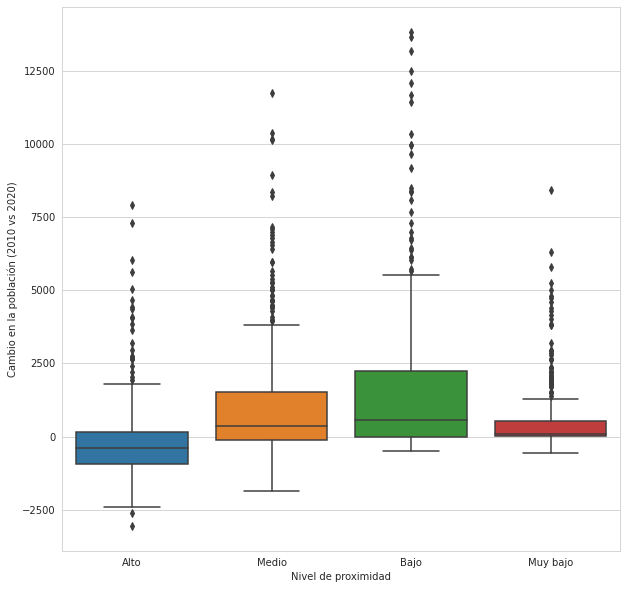

In [49]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array(hex_corr.Nivel_Acc)
y = np.array(hex_corr.T_Pob_10_20)

sns.boxplot(x=x , y=y, ax=ax)

plt.xlabel('Nivel de proximidad')
plt.ylabel('Cambio en la población (2010 vs 2020)')

plt.savefig(f'../data/processed/pop_chng/{c}_BoxPlot_PopChange_ProximityGrpup_res{res}.svg')

In [50]:
hex_corr.groupby('Nivel_Acc').agg(['median','mean','std'])

T_Pob_10_20                           R_VivDes_20            \
               median         mean          std      median      mean   
Nivel_Acc                                                               
Alto           -391.0  -138.955432  1380.913898    0.067147  0.079288   
Medio           351.0  1075.469657  2096.688571    0.089490  0.104937   
Bajo            553.5  1686.842593  2701.160121    0.130791  0.133048   
Muy bajo         90.0   570.908078  1142.349818    0.115385  0.147517   

                    idx_accessibility                      imn_2020            \
                std            median      mean       std    median      mean   
Nivel_Acc                                                                       
Alto       0.050439          0.836317  0.836630  0.046365  0.963979  0.963181   
Medio      0.067168          0.629178  0.626763  0.070012  0.965254  0.963208   
Bajo       0.082876          0.360449  0.369371  0.075933  0.960178  0.961516   
Muy bajo   0.148887          0.107131  0.108644  0.083629  0.961721  0.960958   

                     
                std  
Nivel_Acc            
Alto       0.013511  
Medio      0.020262  
Bajo       0.016743  
Muy bajo   0.021006

In [51]:
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.06301018],
       [0.06301018, 1.        ]])

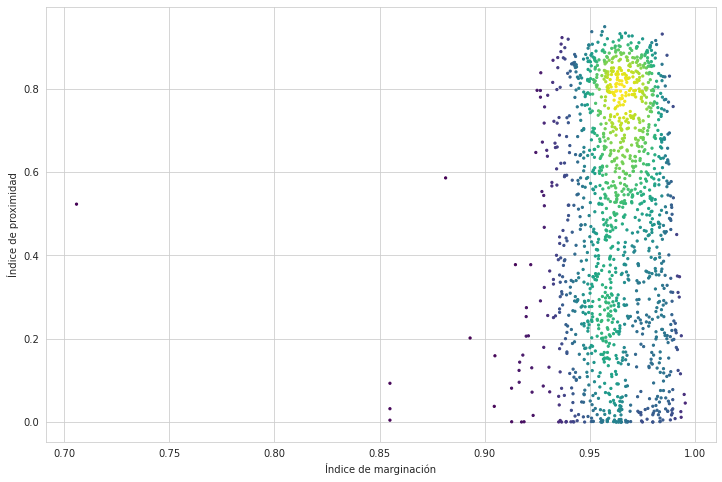

In [52]:
fig, ax = plt.subplots(figsize=(12,8))


# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

ax.scatter(x, y, c=z, s=5, cmap='viridis')

plt.xlabel('Índice de marginación')
plt.ylabel('Índice de proximidad')

plt.show()

# ZMVM

In [53]:
c = 'ZMVM'
res = 8

In [54]:
# df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_index_2020'
# c = 'Monterrey'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM processed.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))
    
print(hex_bins.shape)

(6441, 19)


In [55]:
# df = pd.read_json("../scripts/Metropolis_CVE.json")
hex_marg = gpd.GeoDataFrame()
hex_folder = 'hex_bins_marg_2020'
# c = 'Monterrey'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_marg = hex_marg.append(aup.gdf_from_query(query, geometry_col='geometry'))
print(hex_marg.shape)

(3777, 17)


In [56]:
grl_dir = '/home/edgaregurrola/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/'
hex_pop = gpd.read_file(grl_dir+f'Info_Sociodemografica/Analisis/Block_Census/{c}_Census_10_20_BlockAnalysis_res{res}.geojson', driver='GeoJSON')
print(hex_pop.shape)
hex_pop.head(2)

(3795, 432)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,Z_RTViv_10_20,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,DensPob_10_20,R_TVivDes_10_20,geometry
0,8849950593fffff,2584.0,1325.0,1256.0,69.0,33.0,20.0,2495.0,1277.0,1218.0,...,None,0.856070,0.062578,0.09619,0.0,None,0.856070,3.095422,None,"POLYGON ((-98.95532 19.76038, -98.95079 19.763..."
1,8849958da5fffff,10322.0,5310.0,5003.0,435.0,199.0,205.0,9854.0,5086.0,4768.0,...,None,0.908537,0.060976,0.46020,0.0,None,0.908537,30.829713,None,"POLYGON ((-98.94151 19.41992, -98.93699 19.422..."


In [57]:
import numpy as np

hex_corr = pd.merge(hex_pop[['hex_id_8','T_Pob_10_20',
                            'R_VivDes_20','geometry']], hex_bins[['hex_id_8','idx_accessibility']],
                   on='hex_id_8')
hex_corr = pd.merge(hex_corr, hex_marg[['hex_id_8','imn_2020']], on='hex_id_8')
print(hex_corr.shape)
hex_corr.head(2)

(3633, 6)


,hex_id_8,T_Pob_10_20,R_VivDes_20,geometry,idx_accessibility,imn_2020
0,8849950593fffff,261.0,0.062578,"POLYGON ((-98.95532 19.76038, -98.95079 19.763...",0.366995,0.922526
1,8849958da5fffff,2597.0,0.060976,"POLYGON ((-98.94151 19.41992, -98.93699 19.422...",0.662028,0.925986


Text(0, 0.5, 'Cambio en la población (2010 vs 2020)')

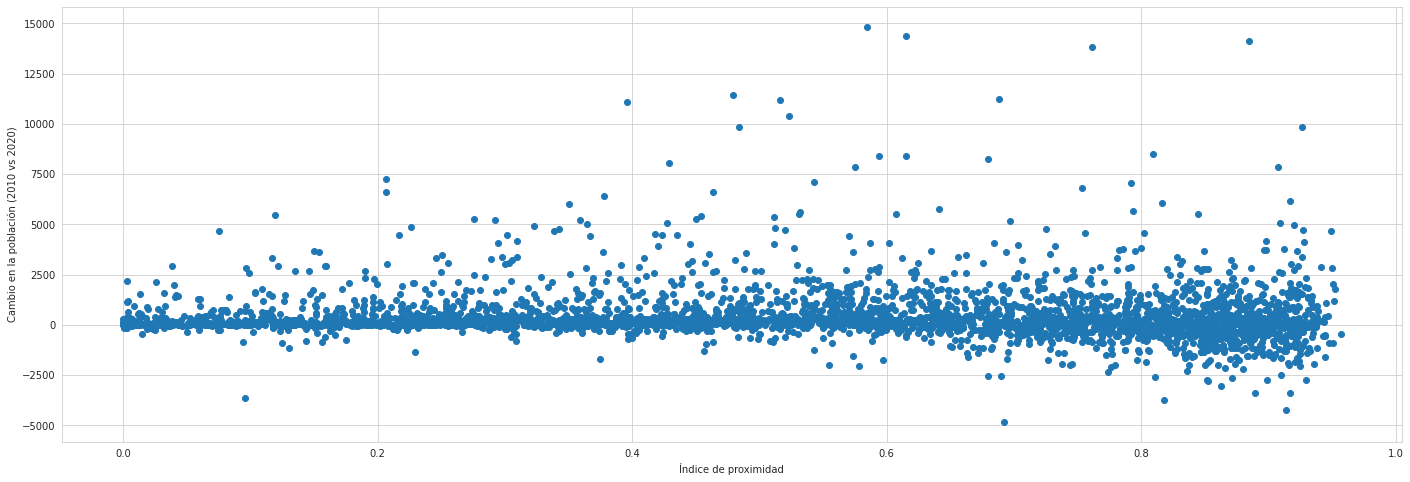

In [58]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.idx_accessibility, hex_corr.T_Pob_10_20)

plt.xlabel('Índice de proximidad')
plt.ylabel('Cambio en la población (2010 vs 2020)')

In [59]:
x = np.array(hex_corr.idx_accessibility)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[ 1.        , -0.03128797],
       [-0.03128797,  1.        ]])

Text(0, 0.5, 'Cambio en la población (2010 vs 2020)')

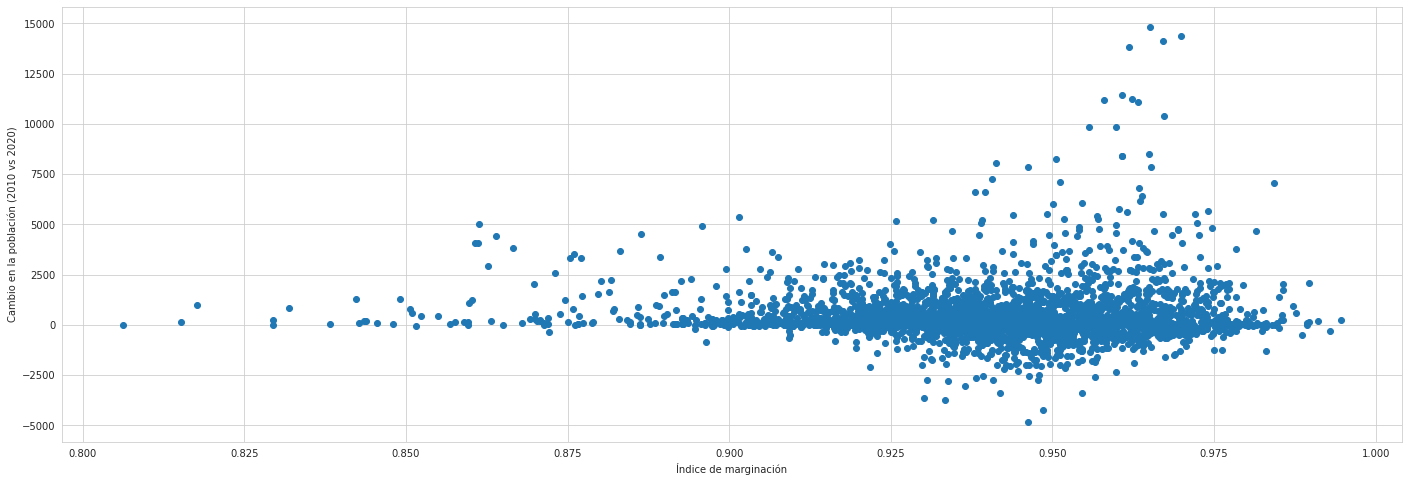

In [60]:
fig, ax = plt.subplots(figsize=(24,8))
    
ax.scatter(hex_corr.imn_2020, hex_corr.T_Pob_10_20)

plt.xlabel('Índice de marginación')
plt.ylabel('Cambio en la población (2010 vs 2020)')

In [61]:
x = np.array(hex_corr.imn_2020)
y = np.array(hex_corr.T_Pob_10_20)
np.corrcoef(x, y)

array([[1.        , 0.02213529],
       [0.02213529, 1.        ]])

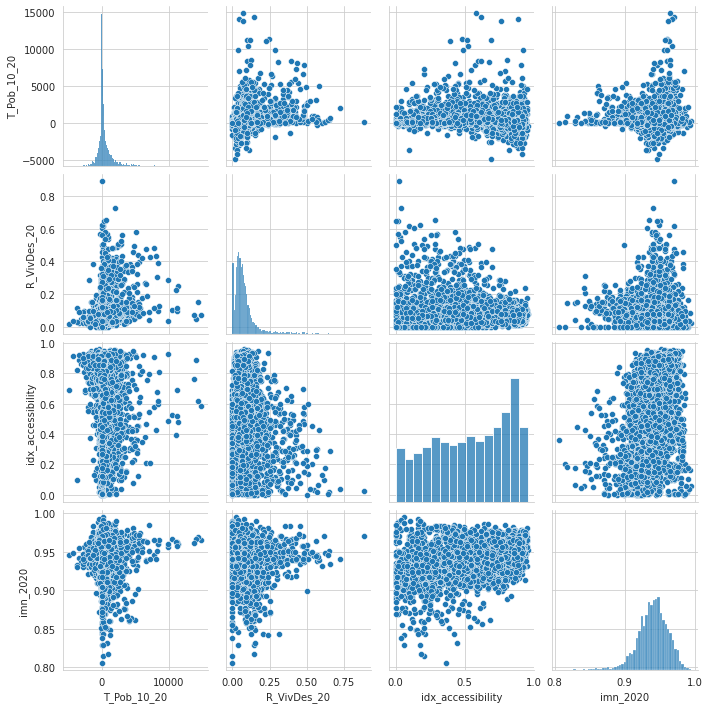

In [62]:
sns.set_style('whitegrid')
sns.pairplot(hex_corr, palette='deep')
plt.show()

In [63]:
hex_corr['Grado_Marg'] = np.nan
hex_corr.loc[hex_corr.imn_2020>=0.966338 , 'Grado_Marg'] = 'Muy bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.946436 )&
             (hex_corr.imn_2020<0.966338), 'Grado_Marg'] = 'Bajo'
hex_corr.loc[(hex_corr.imn_2020>=0.926536)&
             (hex_corr.imn_2020<0.946436), 'Grado_Marg'] = 'Medio'
hex_corr.loc[(hex_corr.imn_2020>=0.8999)&
             (hex_corr.imn_2020<0.926536), 'Grado_Marg'] = 'Alto'
hex_corr.loc[hex_corr.imn_2020 < 0.8999, 'Grado_Marg'] = 'Muy alto'

In [64]:
#categorical data
cat_list = ['Muy bajo','Bajo','Medio','Alto', 'Muy alto']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_corr['Grado_Marg'] = hex_corr['Grado_Marg'].astype(cat_size_order)
hex_corr = hex_corr.sort_values('Grado_Marg')

Text(0, 0.5, 'Cambio en la población (2010 vs 2020)')

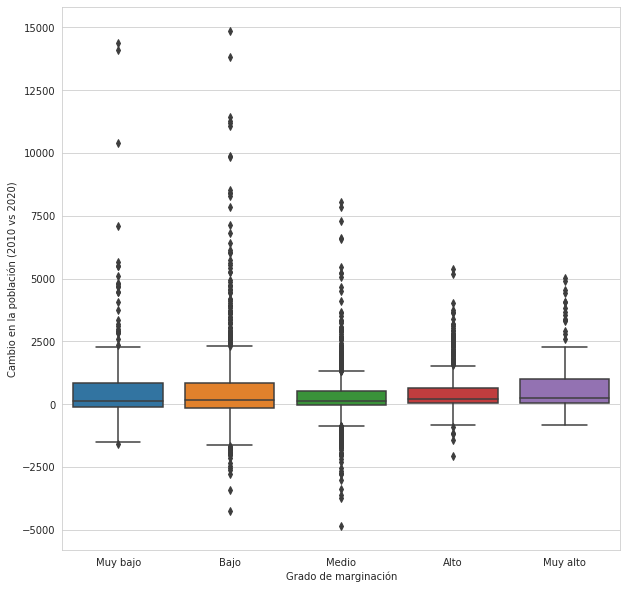

In [65]:
fig, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x=np.array(hex_corr.Grado_Marg) , y=np.array(hex_corr.T_Pob_10_20), ax=ax)

plt.xlabel('Grado de marginación')
plt.ylabel('Cambio en la población (2010 vs 2020)')

In [66]:
hex_corr.groupby('Grado_Marg').agg(['median','mean','std'])

T_Pob_10_20                          R_VivDes_20            \
                median        mean          std      median      mean   
Grado_Marg                                                              
Muy bajo         117.0  628.492021  1635.575363    0.066323  0.086918   
Bajo             163.5  543.401887  1678.021168    0.059372  0.087278   
Medio            136.0  281.291823   988.121672    0.056000  0.077635   
Alto             188.0  450.337969   765.301425    0.064084  0.072906   
Muy alto         239.0  776.765517  1183.438816    0.095652  0.101013   

                     idx_accessibility                      imn_2020  \
                 std            median      mean       std    median   
Grado_Marg                                                             
Muy bajo    0.092695          0.735679  0.634084  0.279136  0.971711   
Bajo        0.088591          0.744939  0.672981  0.226645  0.954561   
Medio       0.087090          0.539496  0.520329  0.256908  0.937268   
Alto        0.061741          0.325757  0.375230  0.260445  0.918988   
Muy alto    0.075165          0.234767  0.261860  0.197367  0.884725   

                                
                mean       std  
Grado_Marg                      
Muy bajo    0.973070  0.005622  
Bajo        0.955032  0.005647  
Medio       0.937240  0.005518  
Alto        0.917199  0.007062  
Muy alto    0.878476  0.019914

In [67]:
hex_corr['Nivel_Acc'] = np.nan
hex_corr.loc[hex_corr.idx_accessibility>=0.75 , 'Nivel_Acc'] = 'Alto'
hex_corr.loc[(hex_corr.idx_accessibility>=0.50 )&
             (hex_corr.idx_accessibility<0.75), 'Nivel_Acc'] = 'Medio'
hex_corr.loc[(hex_corr.idx_accessibility>=0.25)&
             (hex_corr.idx_accessibility<0.50), 'Nivel_Acc'] = 'Bajo'
hex_corr.loc[hex_corr.idx_accessibility < 0.25, 'Nivel_Acc'] = 'Muy bajo'

In [68]:
#categorical data
cat_list = ['Alto','Medio','Bajo','Muy bajo']

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_corr['Nivel_Acc'] = hex_corr['Nivel_Acc'].astype(cat_size_order)
hex_corr = hex_corr.sort_values('Nivel_Acc')

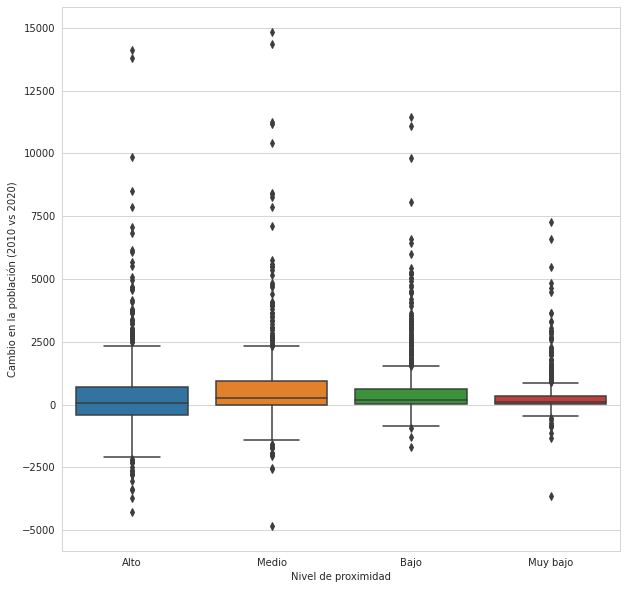

In [69]:
fig, ax = plt.subplots(figsize=(10,10))

x = np.array(hex_corr.Nivel_Acc)
y = np.array(hex_corr.T_Pob_10_20)

sns.boxplot(x=x , y=y, ax=ax)

plt.xlabel('Nivel de proximidad')
plt.ylabel('Cambio en la población (2010 vs 2020)')

plt.savefig(f'../data/processed/pop_chng/{c}_BoxPlot_PopChange_ProximityGrpup_res{res}.svg')

In [70]:
hex_corr.groupby('Nivel_Acc').agg(['median','mean','std'])

T_Pob_10_20                          R_VivDes_20            \
               median        mean          std      median      mean   
Nivel_Acc                                                              
Alto             78.0  263.055806  1400.759288    0.050317  0.058549   
Medio           273.0  620.968951  1470.376999    0.059432  0.076618   
Bajo            200.5  583.847477  1200.114996    0.073109  0.099603   
Muy bajo         93.5  338.477654   786.415612    0.073892  0.101363   

                    idx_accessibility                      imn_2020            \
                std            median      mean       std    median      mean   
Nivel_Acc                                                                       
Alto       0.035682          0.854928  0.851438  0.050853  0.952032  0.950366   
Medio      0.067276          0.635020  0.632084  0.072383  0.942736  0.941969   
Bajo       0.098821          0.374448  0.374892  0.072778  0.936357  0.935158   
Muy bajo   0.119036          0.130105  0.125579  0.078253  0.926818  0.926369   

                     
                std  
Nivel_Acc            
Alto       0.015319  
Medio      0.018405  
Bajo       0.021704  
Muy bajo   0.026426

In [71]:
x = np.array(hex_corr.imn_2020).reshape((1,-1))
y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[1.        , 0.40627597],
       [0.40627597, 1.        ]])

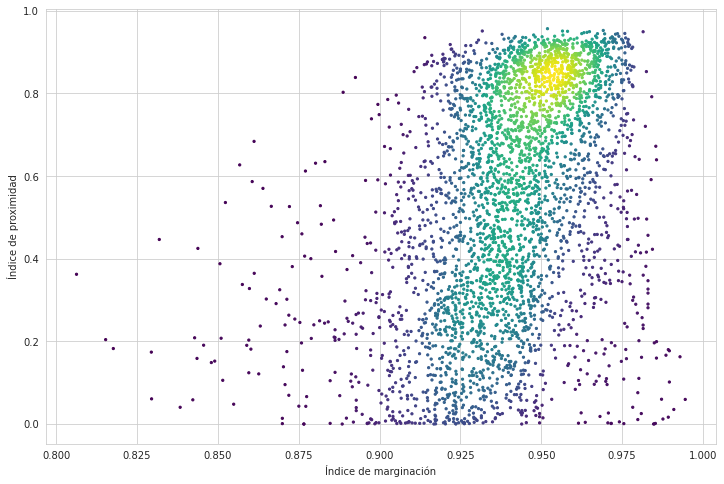

In [72]:
fig, ax = plt.subplots(figsize=(12,8))


# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

ax.scatter(x, y, c=z, s=5, cmap='viridis')

plt.xlabel('Índice de marginación')
plt.ylabel('Índice de proximidad')

plt.show()